*ADS-A Week 3 Assignment 1*

# Basic Charts with Matplotlib

## Matplotlib

First, we import the required libraries, using standard conventions. We first import numpy for all our mathematical needs, then the matplotlib as plotting library and pyplot which gives an ease API to create plots with matplotlib.

In [ ]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# we need the following line to indicate that the plots should be shown inline with the Jupyter notebook.
%matplotlib inline 

We will first create a simple plot of a mathematical function. We first create a numpy array of x-values. Then for each x-value we create the y-value, i.e. the function value. Plotting this function is as easy as giving it the x and y values.

In [ ]:
X = np.linspace(-np.pi, np.pi, 100) # define a NumPy array with 100 points in the range -Pi to Pi
Y = np.sin(X)  # define the curve Y by the sine of X

plt.plot(X,Y); # use matplotlib to plot the function

While creating such plots is perfectly fine when you are exploring data, in your final notebook the plot is hard to understand for the reader. With matplotlib it is very easy to add labels, a title and a legend. You can also change the limits of the plot, the style of the lines and much more.

The following could be seen as the bare minimum for a plot to be understood as part of reproducible research.

In [ ]:
plt.plot(X, Y, 'r--', linewidth=2)
plt.plot(X, Y/2, 'b-', linewidth=2)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Plot Title')
plt.xlim(-4, 4)
plt.ylim(-1.2, 1.2)
plt.legend(['red curve', 'blue curve'], loc='best')

Go to the documentation pages of matplotlib [http://matplotlib.org/contents.html] to find all the possible options for a plot and also to see more tutorials, videos and book chapters to help you along the way.

A few other nice tutorials:
* [http://www.labri.fr/perso/nrougier/teaching/matplotlib/]

This assignment first shows you how to download csv data from an online source. Then we're exploring a dataset of all the cities in the world and compare cities in The Netherlands to the rest of the world.

## Loading data CSV and Pandas
We will work with a database of information about cities around the world:

https://www.maxmind.com/en/free-world-cities-database

Working with data structures can be done in many ways in Python. There are the standard Python arrays, lists and tuples. You can also use the arrays in the numpy package which allow you to do heavy math operations efficiently. For data analysis Pandas is often used, because data can be put into so-called dataframes. Dataframes store data with column and row names and can easily be manipulated and plotted. You will learn more about Pandas in the Machine Learning workshops. A short intro can be found here:

http://pandas.pydata.org/pandas-docs/stable/10min.html

In [18]:
import urllib.request as urllib, zipfile, os

url = 'http://download.maxmind.com/download/worldcities/'
filename = 'worldcitiespop.txt.gz'
datafolder = 'data/'

In [19]:
downloaded = urllib.urlopen(url + filename)
buf = downloaded.read()

try:
    os.mkdir(datafolder)
except FileExistsError:
    pass

with open(datafolder + filename, 'wb') as f:
    f.write(buf)

In [20]:
import pandas as pd
cities = pd.read_csv(datafolder + filename, sep=',', low_memory=False, encoding = 'ISO-8859-1')

## Data Manipulation

We can take a peek at the data by checking out the final rows of data. Do you see any potential problem with this dataset?

In [22]:
cities.tail(5)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
3173953,zw,zimre park,Zimre Park,04,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,00,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,04,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,06,NaN,-20.033333,27.933333
3173957,zw,zvishavane,Zvishavane,07,79876.0,-20.333333,30.033333


In [17]:
cities.sort(columns='Population', ascending=False).head()

AttributeError: 'DataFrame' object has no attribute 'sort'

By sorting the cities on population we immediately see the entries of a few of the largest cities in the world.

## Assignment 1a
To get an idea of where in the world the cities in the dataset are located, we want to make a scatter plot of the position of all the cities in the dataset.

Don't worry about drawing country borders, just plot the locations of the cities.

Remember to use all the basic plot elements you need to understand this plot.

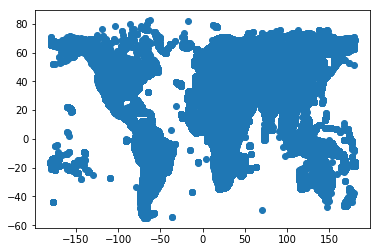

In [24]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

plt.figure();

## Your code ...

x = cities.Latitude
y = cities.Longitude

plt.scatter(y, x)


## Assignment 1b

Now we want to plot the cities in The Netherlands only. Use a scatter plot again to plot the cities, but now vary the size of the marker and the color with the population of that city.

Use a colorbar to show how the color of the marker relates to its population.

Use sensible limits to your axes so that you show only mainland The Netherlands (and not the Dutch Antilles).

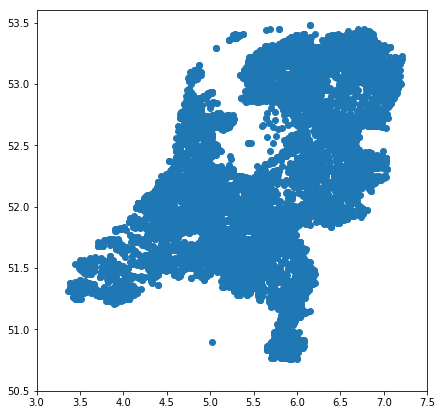

In [26]:
dutch_cities = cities[ cities['Country'] =='nl' ]
plt.figure(figsize=[7,7]);

## Your code ...

X = dutch_cities.Latitude
Y = dutch_cities.Longitude

plt.xlim(3,7.5)#trial and error
plt.ylim(50.5,53.6)#trial and error
plt.scatter(Y,X)


## Assignment 1c

Using assignment B, we could clearly see larger cities such as Amsterdam, Rotterdam and even Eindhoven. But we still do not really have a clear overview of how many big cities there are. To show a distribution we use a histogram plot.

What happens if we do not call the .dropna() function?

Add proper basic plot elements to this plot and try to annotate which data point is Amsterdam and Eindhoven.

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(603.851,0.0015,'Rotterdam: 2032023    603851.0\nName: Population, dtype: float64')

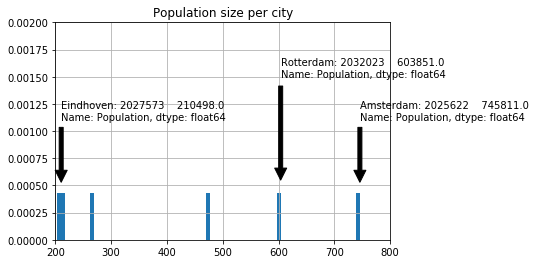

In [27]:
fig = plt.figure();
plt.hist(np.asarray(dutch_cities.dropna().Population/1000), 100, normed=1);

## Your code ...
amsterdam = dutch_cities[dutch_cities.City == "amsterdam"]
eindhoven = dutch_cities[dutch_cities.City == "eindhoven"]
rotterdam = dutch_cities[dutch_cities.City == "rotterdam"]


ax = fig.add_subplot(111)#111 means 1x1 grid, first subplot
plt.grid(True)
plt.xlim(200,800) #trial and error
plt.ylim(0,0.002) #trial and error
plt.title("Population size per city")
ax.annotate('Amsterdam: ' + str(amsterdam.Population), xy=(amsterdam.Population/1000, 0.0005), xytext=(amsterdam.Population/1000, 0.0011),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('Eindhoven: ' + str(eindhoven.Population), xy=(eindhoven.Population/1000, 0.0005), xytext=(eindhoven.Population/1000, 0.0011),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('Rotterdam: ' + str(rotterdam.Population), xy=(rotterdam.Population/1000, 0.0005), xytext=(rotterdam.Population/1000, 0.0015),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

## Assignment 1d

Now we want to compare how the distribution of Dutch cities compares to that of the entire world.

Use subplots to show the dutch distribution (top plot) and the world distribution (bottom plot).

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


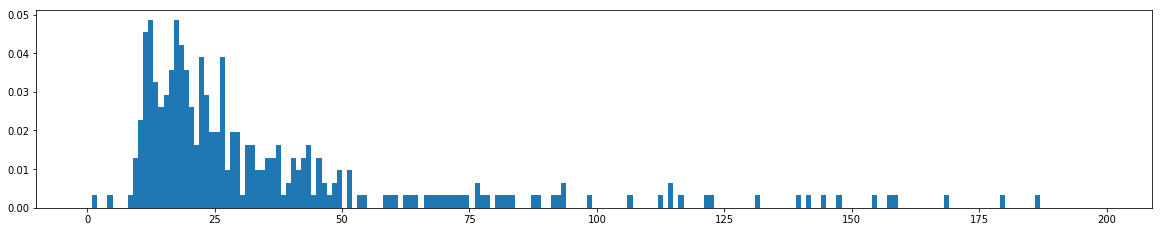

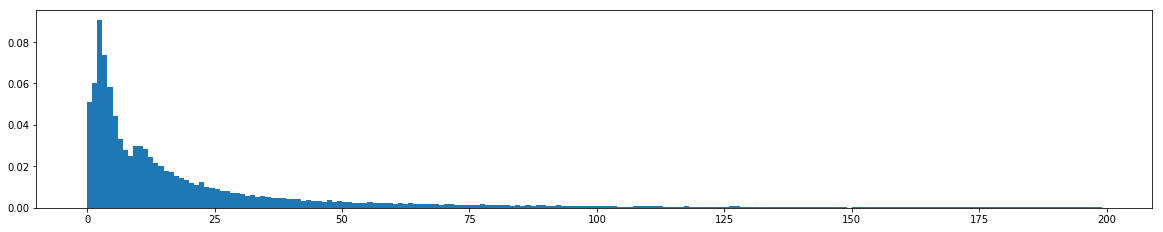

In [29]:
plt.figure(figsize=[20, 8]);
plt.subplot(2,1,1);
plt.hist(np.asarray(dutch_cities.dropna().Population/1000), bins=np.arange(0, 200, 1), normed=1);

# Add the subplot of the world cities below this Dutch one
## Your code ...

plt.figure(figsize=[20, 8]);
plt.subplot(2,1,2);
plt.hist(np.asarray(cities.dropna().Population/1000), bins=np.arange(0, 200, 1), normed=1);



## Assignment 1e

Write what conclusions you can deduce from the above plots?

 - It's a lot easier to visualize data for the netherlands than for the entire world.
 - Annotations are really usefull when you can't visualize things very well
 - If you dont use dropna to filter the NaN's out you screw up your visualization
 